
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

# Trabajo práctico entregable - Parte 2

# Grupo 12# :

#Ana sofia Turchi

#Gaston Aguirre Moro
#Sergio Rafael Nievas
# Cecilia Alamos 

In [1]:
from datetime import date
mydate = date.today().strftime("%d. %B %Y")

In [2]:
import io
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.stats.api as sts
import matplotlib.patches as patches
import seaborn as sns



sns.set_context('talk')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [3]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [4]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [5]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [6]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

In [7]:
alpha = 0.05

In [8]:
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

# **Estimación puntual para la resta entre la media del Salario Mensual Neto para Hombres (mean_hombre) y la del Salario Neto para otros géneros (mean_otros)**

In [9]:
mean_hombre = groupA.mean()
mean_otros = groupB.mean()

std_hombre = groupA.std()
std_otros = groupB.std()

N_hombre = groupA.count()
N_otros = groupB.count()


estimador_puntual = mean_hombre-mean_otros
print("Salario promedio Hombres = "+"{:.1f}".format(mean_hombre))
print("Salario promedio de otros géneros = "+"{:.1f}".format(mean_otros))
print("Estimador puntual = "+"{:.1f}".format(estimador_puntual))


Salario promedio Hombres = 101481.6
Salario promedio de otros géneros = 78219.3
Estimador puntual = 23262.4


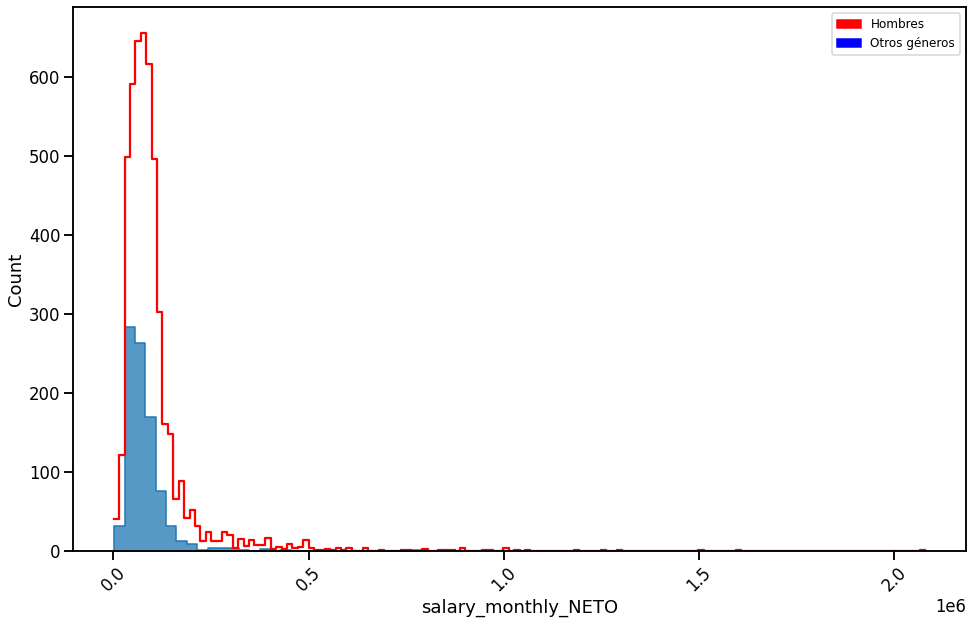

In [10]:
fig = plt.figure(figsize=(16,10))
sns.histplot(groupA,bins=150, color = "red", element = "step", fill = False)
sns.histplot(groupB, bins=30, element = "step")
plt.xticks(rotation=45)
red_patch = patches.Patch(color='red', label='Hombres')
blue_patch = patches.Patch(color='blue', label='Otros géneros')
plt.legend(handles=[red_patch, blue_patch], fontsize='12', markerscale='5')

**A continuación calcularemos el intervalo de confianza**

In [11]:
nu = int( (std_hombre**2/N_hombre+std_otros**2/N_otros)**2\
    /((std_hombre**2/N_hombre)**2/(N_hombre-1.0) +(std_otros**2/N_otros)**2/(N_otros-1.0)) - 2.0 )

print('Grados de libertad: nu =',nu)
t_alpha2_nu = 1.96
print('Por lo tanto, t_(alpha/2,nu) =',t_alpha2_nu)

Grados de libertad: nu = 2146
Por lo tanto, t_(alpha/2,nu) = 1.96


**Por lo tanto el intervalo de confianza nos quedaría:**

In [12]:
sqrt_sigma = np.sqrt(std_hombre**2/N_hombre+std_otros**2/N_otros)

int_left = mean_hombre-mean_otros - t_alpha2_nu*sqrt_sigma
int_right = mean_hombre-mean_otros + t_alpha2_nu*sqrt_sigma
print('Intervalo de confianza: (',int_left,',',int_right,')' )


Intervalo de confianza: ( 18560.580741802645 , 27964.166058033697 )


# **La diferencia entre el promedio del salario Neto correspondiente a Hombres y el de Otros géneros resultó en pesos AR 16924.8, con un intervalo de confianza del 95% (IC95) de 13402.7 - 20446.9. Si consideramos como Hipótesis nula (H0) que no existe diferencia entre el salario promedio Neto entre Hombres y otros géneros, esto es mean_hombre - mean_otros = 0, podríamos decir que el IC95 calculado no incluye a H0. Por lo tanto, no es de esperarse que la diferencia promedio en el salario Neto de los Hombres y Otros géneros sea igual a cero (esto es, que hombres y otros géneros ganen el mismo sueldo).**




## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0=...$

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [13]:
from statsmodels.stats.power import tt_ind_solve_power

In [14]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)

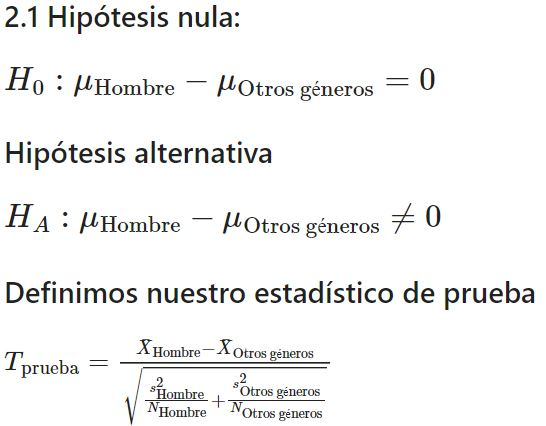

In [15]:
T = (mean_hombre - mean_otros)/sqrt_sigma
print("T = "+"{:.1f}".format(T))

T = 9.7


In [16]:
# veamos cuánto nos da el estadístico de prueba y el p-value considerando variancias desiguales
estadistico_scipy, p_value_scipy = st.ttest_ind(groupA, groupB, equal_var = False)

print("T = "+"{:.1f}".format(estadistico_scipy))
print("p_value = ",p_value_scipy)

T = 9.7
p_value =  8.605197322133209e-22


# **A partir de los datos obtenidos en la encuesta realizada y con un nivel de significancia del 5% rechazamos la Hipótesis nula (H0). No tenemos evidencia suficiente para asegurar que los Hombres ganen en promedio un salario NETO equivalente al de otros géneros. La diferencia promedio en el salario Neto (Hombres-Otros géneros) resultó ser de AR$16924.8 IC95(13405.3 - 20444.3), p_valor = 1,43.10-20**

2.3 POTENCIA DEL TEST

Utilice la función tt_ind_solve_power para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

In [17]:
from statsmodels.stats.power import tt_ind_solve_power

In [18]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)

In [19]:
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=0.80, ratio=ratio)

298.3073379956589

In [20]:
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=0.90, ratio=ratio)

398.7961001403289

In [21]:
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=0.95, ratio=ratio)

492.8117730249174

# **La potencia de un test esta relacionada con el tamaño de muestra que necesito a priori para poder detectar un efecto de tamaño "x" en mis datos. Por ejemplo, para un tamaño de muestra "n" voy a poder establecer un efecto de tamaño "x" el 80% de las veces si estipulamos una potencia de 0.8. En nuestro caso particular, el tamaño de muestra es suficiente para determinar las diferencias en el salario promedio Neto entre Hombres y Otros géneros y parece tener suficiente sustento estadístico para ser utilizado como prueba en un juicio.**

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


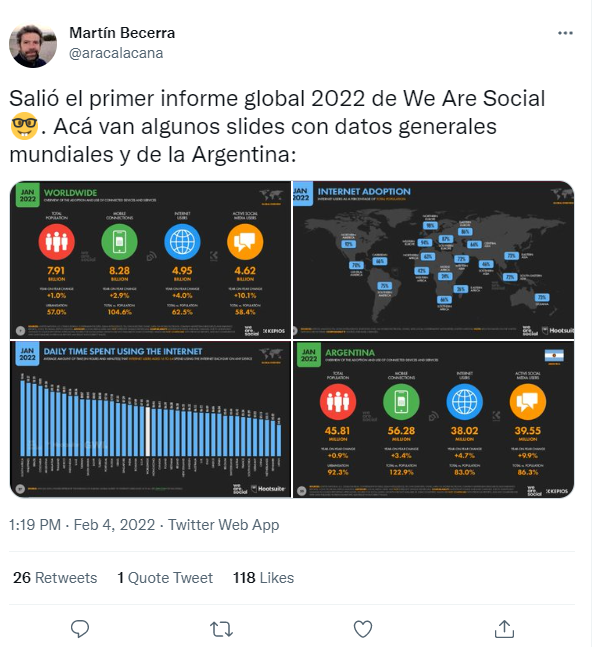

Los datos de los informes de We Are Social no son exactos pero, como aproximación comparativa, son una de las fuentes más estables (que a su vez usa fuentes identificables y verificadas) sobre accesos y usos TIC a nivel mundial.
Esta org. muestra datos relevantes sobre dispositivos de acceso a Internet, sitios web más visitados, razones declaradas (no necesariamente reales) del uso de Internet y tiempo diario dedicado a redes sociales digitales.
El informe incluye datos sobre las plataformas de redes sociales digitales más usadas como Facebook, YouTube y TikTok. 
